# Checking sparse coding reconstruction

In [37]:
import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

from models.model import SparseNet

In [ ]:
model = SparseNet(2000, 784, r_lr=50, lmda=0.0005)
model.load_state_dict(torch.load("sc_logs/SC_try=0/epoch_280.pt"))

In [39]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

In [40]:
batch_size = 100
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)) # MNIST stats
    # transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) # CIFAR 10 stats
])
test_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('data', train=False, download=True, transform=transform),
    batch_size=batch_size, shuffle=True
)

In [41]:
model = model.to(device)

In [42]:
for data in test_loader:
    inputs, label = data
    batch_size = inputs.size(0)
    inputs, label = inputs.view(batch_size, -1).to(device), label.to(device)
    r, output = model(inputs)
    break

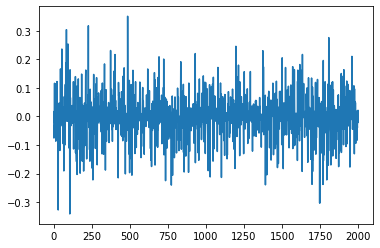

In [45]:
plt.plot(r[0].cpu().detach().numpy())